dataset - https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format/data

reference code - https://www.kaggle.com/code/mahmutyldrmm/a-z-handwritting-alphabets-project

# Imports

In [27]:
%pip install tqdm
%pip install torch
%pip install pandas
%pip install pyyaml
%pip install seaborn
%pip install tensorflow
%pip install matplotlib
%pip install opencv-python
%pip install scikit-learn%pip install git+https://github.com/KindXiaoming/pykan.git


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.4

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.4:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------

  You can safely remove it manually.
  You can safely remove it manually.


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'scikit-learn%pip': Expected end or semicolon (after name and no valid version specifier)
    scikit-learn%pip
                ^


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.utils import shuffle
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers as keras_optimizers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

sns.set()

# Data Preprocessing

In [19]:
dataset = pd.read_csv("./A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label', axis=1)
y = dataset['label']

In [20]:
print("X shape:",X.shape)
print("number of columns:",len(X.iloc[1]))
print("784= 28*28")

X.head()

X shape: (372450, 784)
number of columns: 784
784= 28*28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


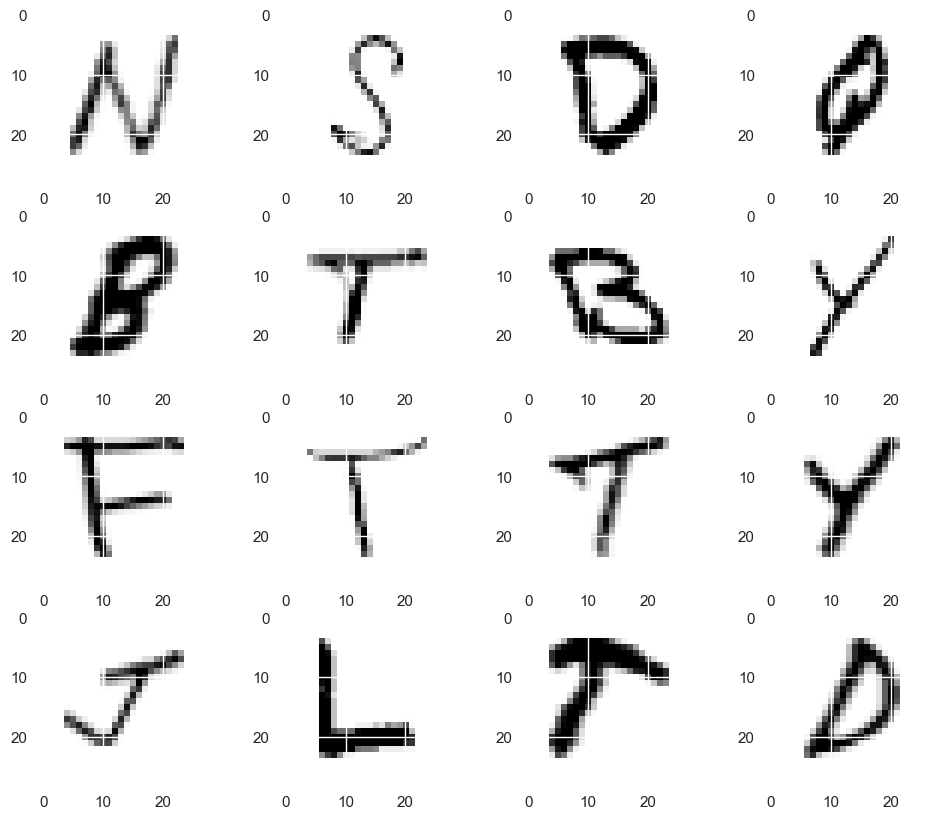

In [21]:
X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, columns = 4, 4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),
           interpolation='nearest',
           cmap='Greys')

plt.show()

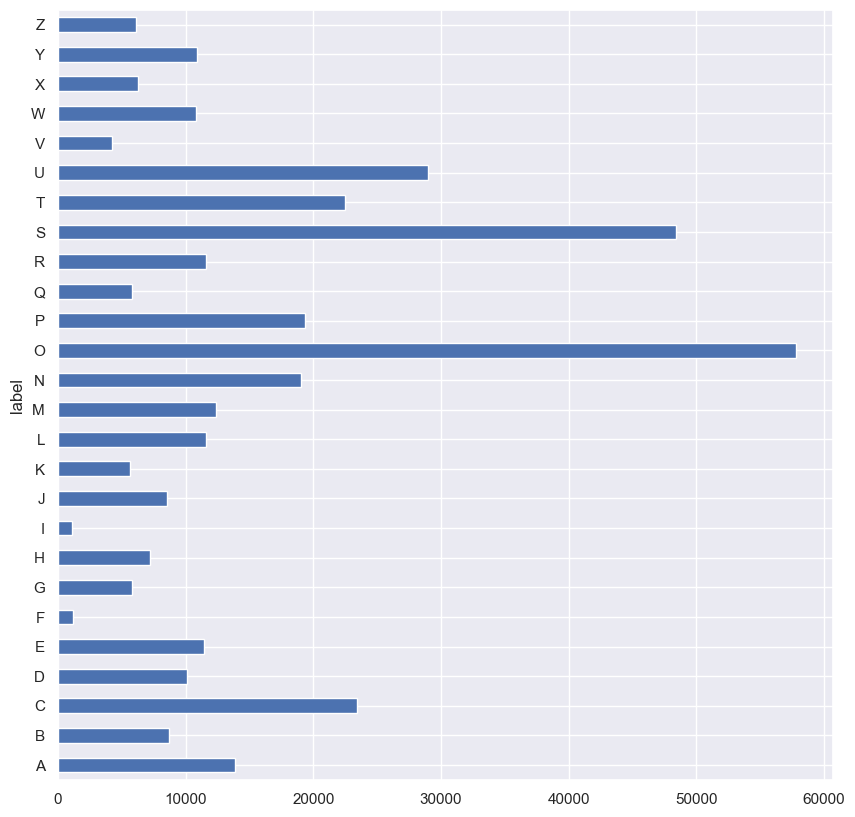

We have very low observations in letters I and F.
Number of I: 1120
Number of F: 1163


In [22]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = dataset.copy()
dataset_alphabets['label'] = dataset_alphabets['label'].map(alphabets_mapper)

label_size = dataset_alphabets.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations in letters I and F.")
print("Number of I:", label_size['I'])
print("Number of F:", label_size['F'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

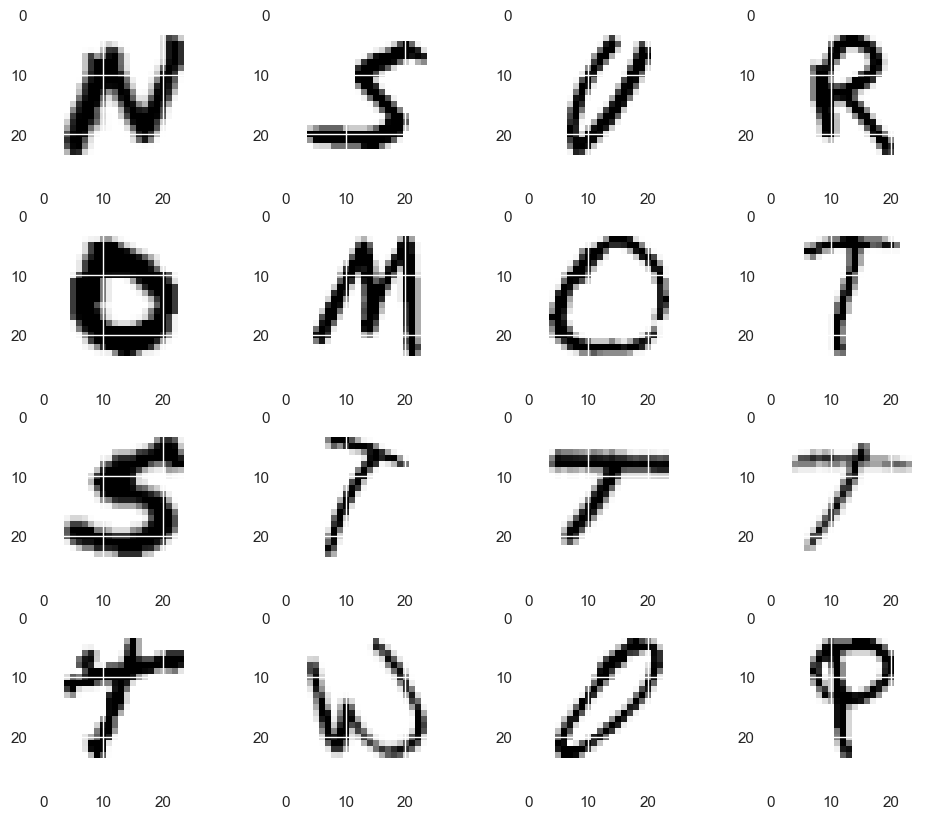

In [24]:
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, columns = 4, 4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

# CNN Model

In [ ]:
cnn_model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])

cls_deneme = Sequential()
cls_deneme.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cls_deneme.add(MaxPooling2D(pool_size=(2, 2)))
cls_deneme.add(Dropout(0.5))

cls_deneme.add(Conv2D(128, (3, 3), activation='relu'))
cls_deneme.add(MaxPooling2D(pool_size=(2, 2)))
cls_deneme.add(Dropout(0.3))

cls_deneme.add(Flatten())
cls_deneme.add(Dense(256, activation='relu'))
cls_deneme.add(Dense(len(y.unique()), activation='softmax'));


In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cls_deneme.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
scores = cnn_model.evaluate(X_test,y_test, verbose=0)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4);

print("CNN Score:",scores[1]);

In [ ]:
history_cnn = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=64),
                            validation_data=(X_test, y_test),
                            epochs=5,
                            callbacks=[early_stopping, reduce_lr],
                            verbose=2)

print("Model Trial 2 training Begins")
history_deneme = cls_deneme.fit(
    datagen.flow(X_train, y_train, batch_size=200),
    validation_data=(X_test, y_test),
    epochs=5,
    callbacks=[early_stopping, reduce_lr],
    verbose=2)



test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Basic CNN Test Accuracy: {test_acc_cnn:.3f}")

In [ ]:
plt.plot(history_cnn.history['accuracy'], label= "Training Accuracy ")
plt.plot(history_cnn.history['val_accuracy'], label= "Verification Accuracy")
plt.title('Model Validation')
plt.ylabel('Verification')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Loss of learning rate')
plt.plot(history_cnn.history['val_loss'], label='Verification Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy= cnn_model.evaluate(X_test, y_test, verbose=0 )
print(f"Test loss: {test_loss:.3f}\nTest accuracy: {test_accuracy:.3f}")

test_loss_deneme, test_accuracy_deneme = cls_deneme.evaluate(X_test, y_test, verbose=0)
print(f"\nModel 2 Test Accuracy (cls_deneme): {test_accuracy_deneme:.3f}")

# Let's make some guesses
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

target_names = ['A','B','C','D','E','F','G','H','I','J',
                'K','L','M','N','O','P','Q','R','S','T',
                'U','V','W','X','Y','Z']

# Classification report
print("\Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names= target_names ))


# Complexity matrix
cm=confusion_matrix(y_test.argmax(axis=1),cnn_model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Complexity Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Let's visualize some examples of correct and incorrect predictions.
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 8))

# Examples of correct predictions
for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[correct])
    plt.title(f"Prediction: {target_names[y_pred_classes[correct]]}\nActual: {target_names[y_true[correct]]}")
    plt.axis('off')

for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 4, i+5)
    plt.imshow(X_test[incorrect])
    plt.title(f"Prediction: {target_names[y_pred_classes[incorrect]]}\nActual: {target_names[y_true[incorrect]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

def preprocess_image_to_mnist(image_path):
    # 1. Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2. Invert the colors (from black-on-white to white-on-black)
    #    This assumes your original image is like MNIST (white digit, black bg)
    #    If your image is black digit on white paper, uncomment the next line
    # img = cv2.bitwise_not(img)

    # 3. Resize the image to 28x28
    #    We use INTER_AREA for shrinking, which is generally good.
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # 4. Normalize pixel values to the [0, 1] range
    img = img.astype('float32') / 255.0

    # 5. Reshape for a model (e.g., a CNN)
    #    Shape becomes (1, 28, 28, 1)
    img = np.reshape(img, (1, 28, 28, 1))

    return img

# --- How to use it ---
# my_image = preprocess_image_to_mnist('path/to/my_digit_image.png')
# prediction = model.predict(my_image)

In [ ]:
img = preprocess_image_to_mnist("/content/o.jpg")
my_pred = cnn_model.predict(img)
my_pred_classes = np.argmax(my_pred, axis=1)
print(f"Predicted class: {alphabets_mapper[my_pred_classes[0]]}, {my_pred_classes}")

# Kolmogorov Arnold Netwoks

## KANs Test

In [13]:
import kan
print(dir(kan))

['Abs', 'AccumBounds', 'Add', 'Adjoint', 'AlgebraicField', 'AlgebraicNumber', 'And', 'AppliedPredicate', 'Array', 'AssumptionsContext', 'Atom', 'AtomicExpr', 'BasePolynomialError', 'Basic', 'BlockDiagMatrix', 'BlockMatrix', 'CC', 'CRootOf', 'Catalan', 'Chi', 'Ci', 'Circle', 'CoercionFailed', 'Complement', 'ComplexField', 'ComplexRegion', 'ComplexRootOf', 'Complexes', 'ComputationFailed', 'ConditionSet', 'Contains', 'CosineTransform', 'Curve', 'DeferredVector', 'DenseNDimArray', 'Derivative', 'Determinant', 'DiagMatrix', 'DiagonalMatrix', 'DiagonalOf', 'Dict', 'DiracDelta', 'DisjointUnion', 'Domain', 'DomainError', 'DotProduct', 'Dummy', 'E', 'E1', 'EPath', 'EX', 'EXRAW', 'Ei', 'Eijk', 'Ellipse', 'EmptySequence', 'EmptySet', 'Eq', 'Equality', 'Equivalent', 'EulerGamma', 'EvaluationFailed', 'ExactQuotientFailed', 'Expr', 'ExpressionDomain', 'ExtraneousFactors', 'FF', 'FF_gmpy', 'FF_python', 'FU', 'FallingFactorial', 'FiniteField', 'FiniteSet', 'FlagError', 'Float', 'FourierTransform', 'F

In [ ]:
%pip show pykan

Name: pykan
Version: 0.2.8
Summary: Kolmogorov Arnold Networks
Home-page: 
Author: Ziming Liu
Author-email: zmliu@mit.edu
License: 
Location: c:\Users\Kshitij\Downloads\Major Project\.venv\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
from kan import KAN
model = KAN(width=[2, 5, 1])

checkpoint directory created: ./model
saving model version 0.0


In [15]:
from kan.utils import create_dataset
f = lambda x: 3*x[:,[0]]**3+2*x[:,[0]]+4 + 2 * x[:,[0]] * x[:,[1]] ** 2 + 3 * x[:,[1]] ** 3
dataset = create_dataset(f, n_var=2)

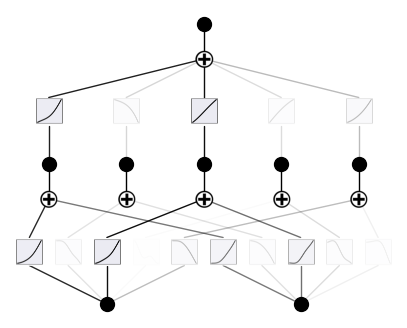

In [16]:
model(dataset['train_input']);
model.plot()

In [17]:
model.fit(dataset, steps=1000);

| train_loss: 1.75e-03 | test_loss: 1.88e-03 | reg: 2.15e+01 | : 100%|█| 1000/1000 [01:30<00:00, 11.

saving model version 0.1


## KANs Implementation

In [47]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

False
No GPU detected


In [52]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [57]:
import torch
import numpy as np
from kan import KAN
# Prepare the A_Z dataset for KAN
# The input shape for KAN is [batch_size, num_features].
# Our X_train and X_test are already flattened and scaled.
# Convert numpy arrays to tensors
dataset_kan = {
    'train_input': torch.from_numpy(X_train.reshape(X_train.shape[0], -1)),
    'test_input': torch.from_numpy(X_test.reshape(X_test.shape[0], -1)),
    'train_label': torch.from_numpy(y_train.astype(np.float32)),
    'test_label': torch.from_numpy(y_test.astype(np.float32))
}

# KAN model with appropriate input and output dimensions
# Input dimension is 784 (28*28)
# Output dimension is 26 (number of classes)
kan = KAN(width=[784, 64, 32, 26])

kan = kan.to(device)  # <— move model to GPU if available

#
# kan(dataset_kan['train_input']);
# kan.plot()

checkpoint directory created: ./model
saving model version 0.0


In [58]:
batch_size = 256
for i in range(0, len(dataset_kan['train_input']), batch_size):
    batch_x = dataset_kan['train_input'][i:i+batch_size]
    batch_y = dataset_kan['train_label'][i:i+batch_size]
    output = kan(batch_x)


KeyboardInterrupt: 

In [ ]:
# Train the KAN model on the A_Z dataset
kan.fit(dataset_kan, steps=100)

In [ ]:
kan = kan.prune()
kan.plot()